## Stack - Projeto Human Resources Analytics

### Análise Exploratória de Dados.

In [3]:
import pandas as pd
import datetime
import glob
from minio import Minio
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [5]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [6]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [5]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [6]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [7]:
df.isnull().sum()

department                 1
salary                     1
left                       1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
dtype: int64

In [8]:
df[df.notnull()]

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
14995,support,low,1.0,253.333333,2.0,37.0,48.0,3.0,0.0
14996,support,low,1.0,288.000000,2.0,37.0,53.0,3.0,0.0
14997,support,low,1.0,272.000000,6.0,11.0,96.0,4.0,0.0
14998,support,low,1.0,276.666667,2.0,37.0,52.0,3.0,0.0


In [9]:
df = df[:14998]

#### Alterando os tipos de dados.

In [10]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   left                     14998 non-null  int32  
 3   mean_work_last_3_months  14998 non-null  int32  
 4   number_projects          14998 non-null  int32  
 5   satisfaction_level       14998 non-null  float64
 6   last_evaluation          14998 non-null  float64
 7   time_in_company          14998 non-null  int32  
 8   work_accident            14998 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 761.7+ KB


In [12]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1,266,2,38.0,53.0,3,0
1,sales,medium,1,252,5,80.0,86.0,6,0
2,sales,medium,1,289,7,11.0,88.0,4,0
3,sales,low,1,275,5,72.0,87.0,5,0
4,sales,low,1,292,2,37.0,52.0,3,0


#### Renomeando atributos

In [20]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'ProjectCount': 'project_count',
                        'AverageMonthlyHours': 'avg_monthly_hours',
                        'TearsAtCompany': 'years_at_company',
                        'WorkAccident': 'work_accident',
                        'left' : 'turnover'
                        })

In [21]:
df.head()

,department,salary,turnover,avg_monthly_hours,project_count,satisfaction,evaluation,years_at_company,work_accident
0,sales,low,1,266,2,38.0,53.0,3,0
1,sales,medium,1,252,5,80.0,86.0,6,0
2,sales,medium,1,289,7,11.0,88.0,4,0
3,sales,low,1,275,5,72.0,87.0,5,0
4,sales,low,1,292,2,37.0,52.0,3,0


##  Análise Estatística

#### Verificando o número de registros.

In [22]:
df.shape

(14998, 9)

#### Calculando a taxa de turnover

In [23]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761968
1    0.238032
Name: turnover, dtype: float64

#### Overview statistico dos dados.

In [24]:
df.describe()

,turnover,avg_monthly_hours,project_count,satisfaction,evaluation,years_at_company,work_accident
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,0.238032,275.685558,3.803174,61.284971,71.611482,3.498266,0.144619
std,0.425893,10.055010,1.232546,24.863103,17.116733,1.460179,0.351728
min,0.000000,232.000000,2.000000,9.000000,36.000000,2.000000,0.000000
25%,0.000000,269.000000,3.000000,44.000000,56.000000,3.000000,0.000000
50%,0.000000,276.000000,4.000000,64.000000,72.000000,3.000000,0.000000
75%,0.000000,282.000000,5.000000,82.000000,87.000000,4.000000,0.000000
max,1.000000,321.000000,7.000000,100.000000,100.000000,10.000000,1.000000


#### Overview statistico por turnover.

In [39]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,avg_monthly_hours,project_count,satisfaction,evaluation,years_at_company,work_accident
turnover,,,,,,
0,275.717973,3.791390,64.320704,71.654708,3.387994,0.160658
1,275.581793,3.840896,51.567227,71.473109,3.851261,0.093277


O conjunto de dados tem:

- 14.998 observações de empregados e 9 atributos.
- A empresa tem uma rotatividade média de 24%.
- A satisfação média dos empregados é de 61.
-- A satisfação média dos empregados que deixaram a empresa é 51.

#### Calculando a matriz de correlação.

,turnover,avg_monthly_hours,project_count,satisfaction,evaluation,years_at_company,work_accident
turnover,1.000000,-0.005768,0.017107,-0.218461,-0.004518,0.135122,-0.081588
avg_monthly_hours,-0.005768,1.000000,-0.009788,0.007671,-0.007085,0.004822,0.011992
project_count,0.017107,-0.009788,1.000000,-0.143080,0.349261,0.196767,-0.004781
satisfaction,-0.218461,0.007671,-0.143080,1.000000,0.104955,-0.100892,0.058673
evaluation,-0.004518,-0.007085,0.349261,0.104955,1.000000,0.131571,-0.007136
years_at_company,0.135122,0.004822,0.196767,-0.100892,0.131571,1.000000,0.002111
work_accident,-0.081588,0.011992,-0.004781,0.058673,-0.007136,0.002111,1.000000


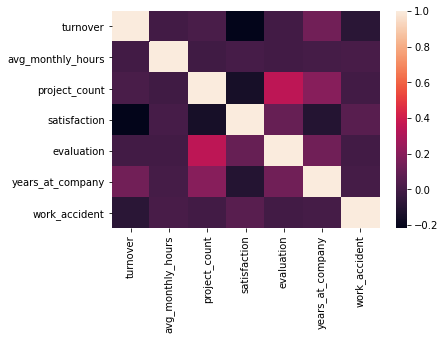

In [26]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

###  Correlation Matrix & Heatmap
***
**Atributos com uma correlação moderada positiva:** 
- project_count vs evaluation: 0.34
- years_at_company vs project_count: 0.19

**Atributos com uma correlação moderada negativa:**
 - satisfaction vs turnover:  -0.21

**Questões:**
- Quais atributos afetam nossa variável alvo (turnover)?
- Existem atributos com alta correlação entre eles?
- Como podemos aprofundar para entender as correlações?

**Resumo:**

Existe uma **correlação positiva** entre os atributos project_count e evaluation.

Faz sentido que empregados que estão envolvidos em mais projetos, trabalham mais e tem melhor avaliação.

Existe uma **correlação negativa** entre os atributos satisfaction e turnover.

Podemos assumir que empregados que mais deixam a empresa estão menos satisfeitos.

#### Calculando distribuições dos atributos.

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


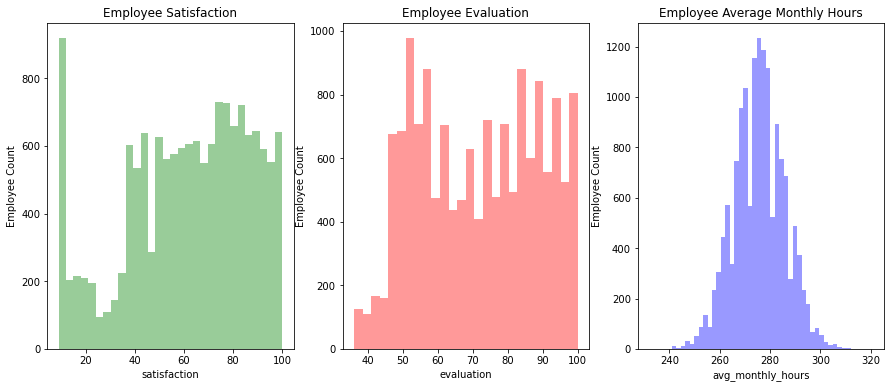

In [29]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.avg_monthly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours')
axes[2].set_ylabel('Employee Count')

plt.show()

## Distribuiçöes (Satisfaction - Evaluation - Average Monthly Hours)
***
**Summary:** Examinando a distribuição de alguns atributos do conjunto de dados:
 - **Satisfaction** - Existe um pico de empregados com baixa satisfação mas a maior concentração está em 60 a 80.
 - **Evaluation** - Temos uma distribuição bimodal de empregados com avaliações baixas, menor que de 60 e altas, maior que 80.
 - **Average Monthly Hours** - A concentração da quantidade de horas trabalhadas nos últimos 3 meses está ao redor da média em 275 horas.
 
**Questões:** 
 - Existe uma razão para o pico de empregados insatisfeitos?

#### Verificando o turnover em relação ao salário.

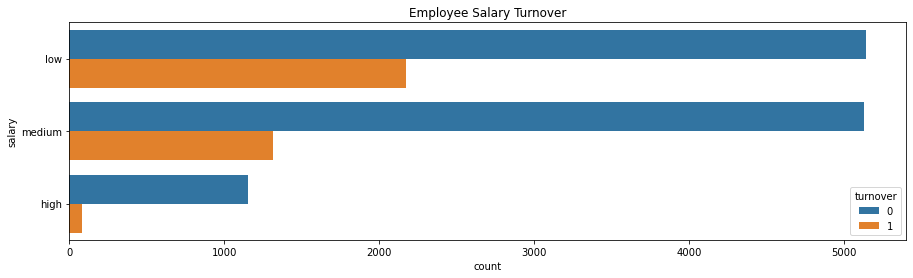

In [30]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover');

##  Salary vs Turnover
***
**Summary:**
 - A maioria dos empregados que saíram tinha salário **baixo** ou **médio**.
 - Quase nenhum empregado com alto salário deixou a empresa.
 
**Questões:** 
 - Como é o ambiente de trabalho? Isso se difere por salário?
 - O que faz empregados com alto salário sairem da empresa?

#### Verificando o turnover em relação departamento.

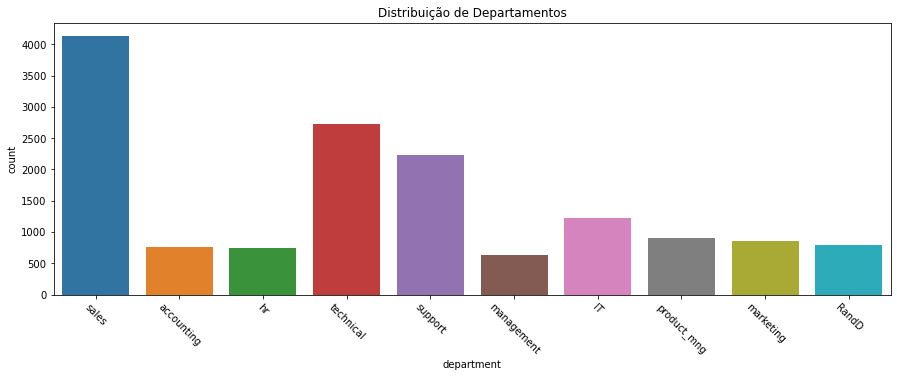

In [33]:
f, ax = plt.subplots(figsize=(15, 5))

plt.xticks(rotation=-45)

sns.countplot(x='department', data=df).set_title('Distribuição de Departamentos');

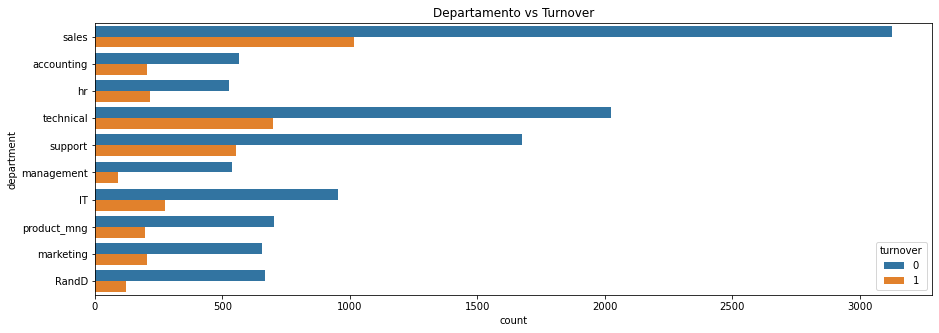

In [34]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Departamento vs Turnover');

## Department vs Turnover 
***
**Resumo:** Vamos ver mais informações sobre os departamentos da empresa.
 - Os departamentos de **vendas, técnico e suporte** são top 3 departamentos com maior índice de turnover.
 - O departamento **management** tem o menor volume de turnover.

**Questões:** 
 - Será que examinar em profundidade os departamentos que tem maior índice de turnover e o menor pode nos revelar mais    informações importantes?
 - Qual o salário nestes departamentos?

#### Verificando o turnover em relação ao número de projetos.

[]

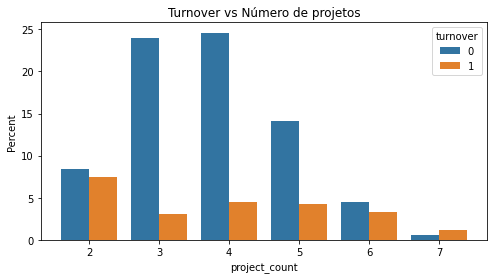

In [36]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="project_count", y="project_count", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Turnover vs Número de projetos')
plt.plot()

##  Turnover vs ProjectCount 
***
**Resumo:** Insights interessantes que encontramos aqui:
 - Mais da metade dos empregados com **7 projetos** deixam a empresa.
 - A maioria dos empregados que permancem na empresa estão envolvidos de **3 à 5 projetos**.
 - Todos os empregados que estavam inseridos **7 projetos** deixaram a empresa.
 - Existe uma **pequena tendência de crescimento no índice de turnover** em relação à quantidade de projetos.
 
**Questões:**
 - Por que os empregados estão deixando a empresa em relação a quantidade de projetos ?
 - Será que faz sentido pensar que empregados envolvidos em 2 ou menos projetos estão desmotivados e por isso deixam a empresa?
 - Será que empregados envolvidos em mais que 6 projetos se sintam sobrecarregados e deixam a empresa?

#### Verificando o turnover em relação a nota de avaliação.

[]

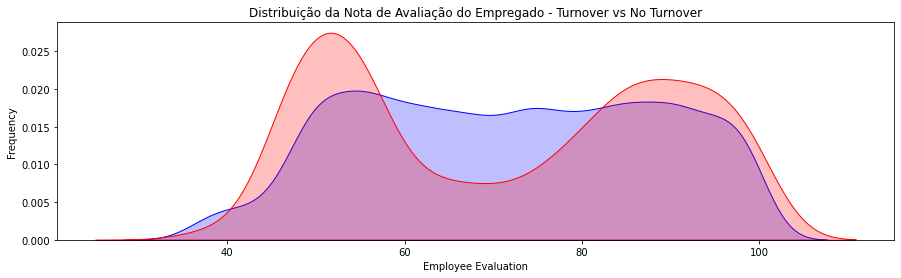

In [40]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Distribuição da Nota de Avaliação do Empregado - Turnover vs No Turnover')
plt.plot()

## Turnover vs Evaluation 
***
**Resumo:** 
 - Temos uma distribuição bimodal para o conjunto que deixou a empresa.
 - Colaboradores com **baixa performance** tendem a deixar a empresa.
 - Colaboradores com **alta performance** tendem a deixar a empresa.
 - O **ponto ideal** para os funcionários que permaneceram está dentro da avaliação de 60 à 80.

#### Verificando o turnover em relação a satisfação do empregado.

[]

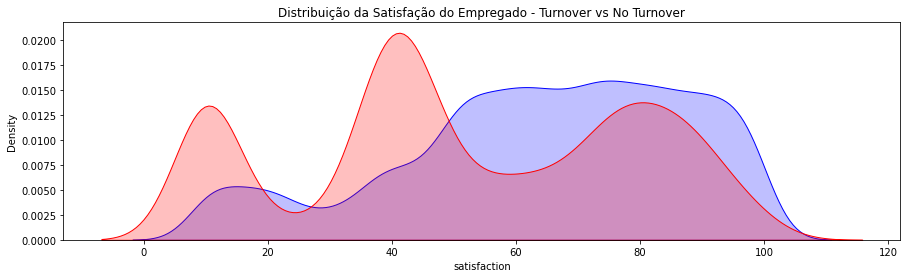

In [42]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Distribuição da Satisfação do Empregado - Turnover vs No Turnover')
plt.plot()

##  Turnover vs Satisfaction 
***
**Resumo:** 
 - Empregados com o nível de satisfação em 20 ou menos tendem a deixar a empresa.
 - Empregados com o nível de satisfação em até 50 tem maior probabilidade de deixar a empresa.

#### Verificando a relação entre número de projetos e a nota de avaliação do empregado.

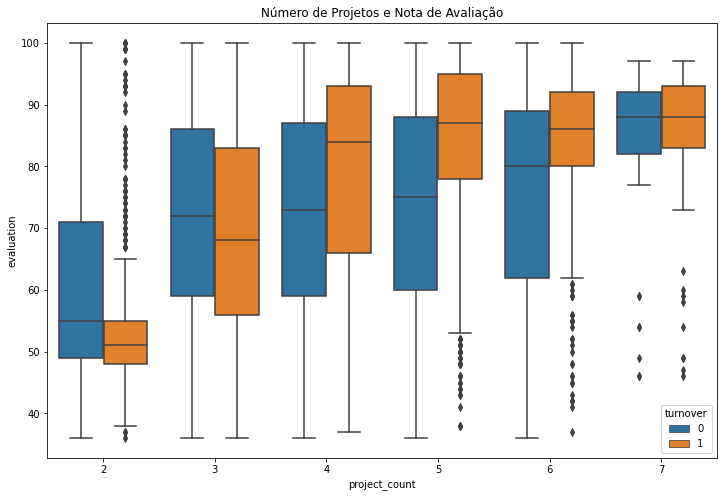

In [45]:
fig = plt.figure(figsize=(12, 8))
import seaborn as sns
sns.boxplot(x="project_count", y="evaluation", hue="turnover", data=df)
plt.title("Número de Projetos e Nota de Avaliação")
plt.show()

##  Project Count vs Evaluation
***
**Resumo:** 
- Há um **aumento na avaliação** para os funcionários que realizaram mais projetos dentro do grupo de quem deixou a empresa. 
- Para o grupo de pessoas que permaneceram na empresa, os empregados tiveram uma **pontuação de avaliação consistente**, apesar do aumento nas contagens de projetos.
- Empregados que permaneceram na empresa tiveram uma **avaliação média em torno de 70%**, mesmo com o número de projetos crescendo.
- Esta relação muda drasticamente entre os empregados que deixaram a empresa. A partir de 3 projetos, as **médias de avaliação aumentam consideravelmente**.
- Empregados que tinham **dois projetos e uma péssima avaliação** saíram.
- Empregados com **mais de 3 projetos e avaliações altas** deixaram a empresa.

**Questões:**
  - Por que será que os funcionários que saíram tiveram em média uma avaliação superior aos funcionários que não saíram, mesmo com um aumento no número de projetos?
  - Os funcionários com avaliações mais baixas não deveriam ter tendência a sair mais da empresa?

#### Verificando a relação entre a satisfação do empregado e a sua avaliação.

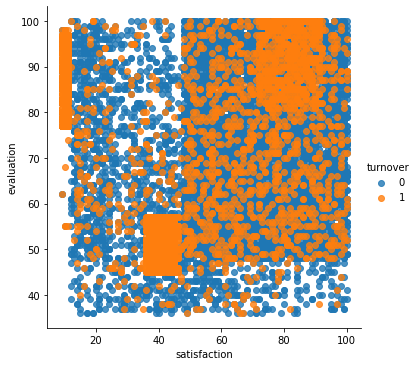

In [46]:
sns.lmplot(x = 'satisfaction', 
           y = 'evaluation', 
           data = df,
           fit_reg = False,
           hue='turnover')

##  Satisfaction vs Evaluation
***
**Resumo:**: Temos aqui 3 grupos distintos de empregados.
 
**Cluster 1 (Empregados insatisfeitos e trabalhadores):** A satisfação foi inferior a 20 e as avaliações foram superiores a 75. 
- O que pode ser uma boa indicação de que os funcionários que deixaram a empresa eram bons trabalhadores, mas se sentiam péssimos no trabalho.

Questões: 
 - Qual poderia ser o motivo de se sentir tão mal quando você é altamente avaliado? 
 - Será que está trabalhando muito? 
 - Esse cluster poderia significar funcionários que estão "sobrecarregados"? 
 
**Cluster 2 (Empregados ruins e insatisfeitos):** Satisfação entre 35 à 50 e as suas avaliações abaixo de ~ 58. 

Questões:
- Isso pode ser visto como funcionários que foram mal avaliados e se sentiram mal no trabalho.
- Podemos chamar esse grupo de baixo desempenho?

**Cluster 3 (Empregados satisfeitos e bem avaliados):** Satisfação entre 75 à 90 e avaliações superiores a 80. 
- O que poderia significar que os funcionários neste grupo eram "ideais". 
- Eles amavam seu trabalho e eram altamente avaliados por seu desempenho.

Questões: 
- Este grupo pode representar os empregados que deixaram a empresa porque encontraram outra oportunidade de trabalho?
- Poderiamos ter mais do que 3 clusters?

#### Computando os clusters

#### Importando a biblioteca Scikit-learn

In [47]:
from sklearn.cluster import KMeans

#### Inicializando os clusters.

In [48]:
kmeans = KMeans(n_clusters=3,random_state=2)

#### Definindo o conjunto de dados.

In [49]:
df_turnover = df[df.turnover==1][["satisfaction","evaluation"]]

#### Computando os clusters.

In [50]:
kmeans.fit(df_turnover)

KMeans(n_clusters=3, random_state=2)

In [51]:
kmeans_colors = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans.labels_]

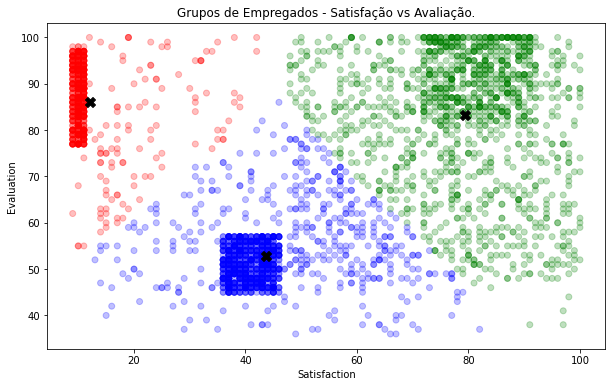

In [52]:
fig = plt.figure(figsize=(10, 6))
plt.scatter( x="satisfaction"
            ,y="evaluation"
            ,data=df_turnover,
            alpha=0.25,color = kmeans_colors)

plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

plt.scatter( x=kmeans.cluster_centers_[:,0]
            ,y=kmeans.cluster_centers_[:,1]
            ,color="black"
            ,marker="X",s=100)

plt.title("Grupos de Empregados - Satisfação vs Avaliação.")
plt.show()

## K-Means Grupos
***
**Cluster 0 (Verde):** Empregados bem avaliados e satisfeitos.

**Cluster 1 (Vermelho):** Empregados bem avaliados e insatisfeitos. 

**Cluster 2 (Azul):** Empregados mal avaliados e insatisfeitos.

#### Verificando a relação entre o tempo de empresa e o turnover.

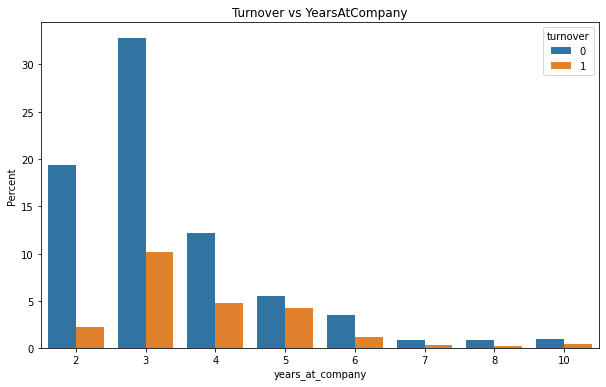

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x="years_at_company", y="years_at_company", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title("Turnover vs YearsAtCompany")
plt.show()

##  Turnover vs Years At Company 
***
**Resumo:** Vamos ver mais alguns pontos para entender o porque os empregados deixam a empresa.
 - Mais empregados com **4 e 5 anos de casa** deixaram a empresa.
 - Empregados acima de **5 anos de casa** devem ser examinados.
 
**Questões:**
  - Por que os empregados saem da empresa principalmente entre 3-5 anos?
  - Quem são esses empregados que saíram?

### Carrega os artefatos para o Data Lake.

In [55]:
import joblib

#### Persistindo o objeto cluster para o disco.

In [56]:
joblib.dump(kmeans, "cluster.joblib")

['cluster.joblib']

#### Transferindo o arquivo para o Data Lake.

In [57]:
client.fput_object(
    "curated",
    "cluster.joblib",
    "cluster.joblib"
)

# Sweetviz

In [59]:
import sweetviz as sv

my_report = sv.analyze(df,"turnover")
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
